In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow


In [4]:
from pathlib import Path
from sklearn.utils import Bunch
from skimage.io import imread
from skimage.transform import resize

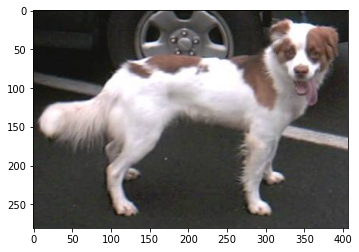

In [6]:
img = plt.imread("/home/hemanth/Documents/DeepLearning/cat-dog_images/dog/dog.1500.jpg")
plt.imshow(img)

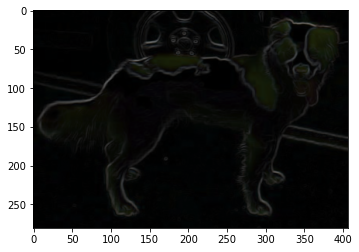

In [13]:
from skimage import filters
edges = filters.sobel(img)
plt.imshow(edges)

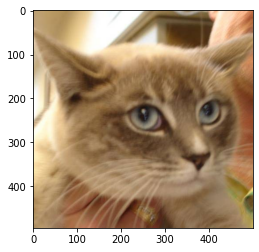

In [23]:
img = plt.imread("/home/hemanth/Documents/DeepLearning/cat-dog_images/cat/cat.1512.jpg")
plt.imshow(img)

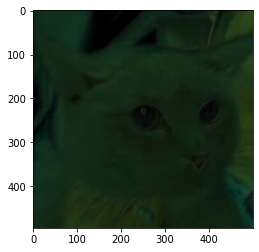

In [24]:
from skimage import io, filters
edges = filters.sobel(img)
plt.imshow(edges)

In [25]:
def load_image_files(container_path, dimension=(64, 64)):
    
    """Loading Multiple Images From the Folder and Which Consists  of Different Shape of Data We Have to Bring them in 64 ,64 Shape
    as well as 
    Parameters
    ----------
    container_path : string or unicode of images in the SubFolders Path to the main folder holding one subfolder[Cat,Dog] 
    Each and Every category[Cat, Dog]
    Dimensions: We Have Bring Ddifferent Images into Same equal shape
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr ="""cat and Dog Image Classification Problem"""
    
    images = []
    flat_data = []
    target = []
    
    for i,direc in enumerate(folders):
        for file in direc.iterdir():
            # Before Converting 
            img = skimage.io.imread(file)
            plt.imshow(img)
            #plt.show()
            
            # After Converting  Image Sahpe in 64 ,64
            img_resized =resize(img, dimension, anti_aliasing=True, mode='reflect')
            plt.imshow(img_resized)
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    
    return Bunch(data=flat_data,
                target=target,
                target_name = categories,
                images= images,
                DESCR =descr )

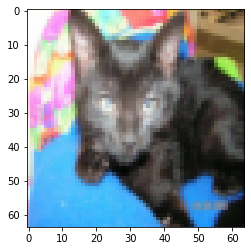

In [26]:
import skimage
image_dataset = load_image_files("/home/hemanth/Documents/DeepLearning/cat-dog_images/")

In [27]:
image_dataset.keys()

dict_keys(['data', 'target', 'target_name', 'images', 'DESCR'])

In [28]:
image_dataset.data

array([[0.07591672, 0.01565564, 0.00784314, ..., 0.79690564, 0.73116048,
        0.52714461],
       [0.25257353, 0.68002451, 0.6564951 , ..., 0.64797794, 0.6382688 ,
        0.53752777],
       [0.37365196, 0.38365742, 0.35620644, ..., 0.50171569, 0.4921133 ,
        0.46288057],
       ...,
       [0.40628064, 0.08627451, 0.18667279, ..., 0.58498775, 0.20223652,
        0.31697567],
       [0.56599265, 0.64831495, 0.66608456, ..., 0.90257449, 0.91145929,
        0.91278675],
       [0.99607843, 0.99607843, 0.99215686, ..., 0.04607843, 0.07487554,
        0.0850471 ]])

In [29]:
image_dataset.target # Cat:0 and Dog:1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
image_dataset.target_name

['dog', 'cat']

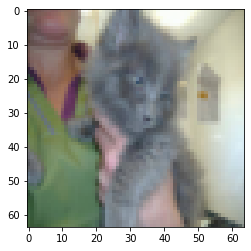

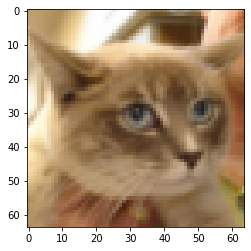

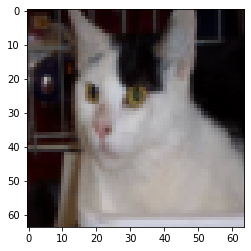

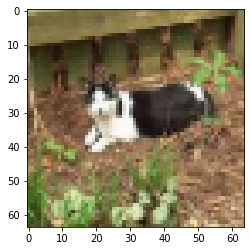

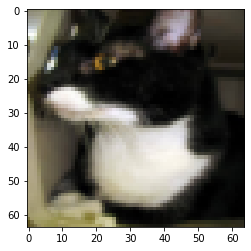

In [32]:
for I in range(70,75):
    plt.imshow(image_dataset.images[I])
    plt.show()

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(image_dataset.data,image_dataset.target,random_state=1)
x_train.shape

(60, 12288)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60, 12288)
(20, 12288)
(60,)
(20,)


# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
LogReg_clf = LogisticRegression(solver='liblinear',random_state = 0)
LogReg_clf.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [54]:
train_score=LogReg_clf.score(x_train,y_train)
train_score

1.0

In [55]:
test_score=LogReg_clf.score(x_test,y_test)
test_score

0.65

In [56]:
y_pred = LogReg_clf.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
acc =  accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(acc)
print(cm)

0.65
[[8 5]
 [2 5]]


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.50      0.71      0.59         7

    accuracy                           0.65        20
   macro avg       0.65      0.66      0.64        20
weighted avg       0.70      0.65      0.66        20



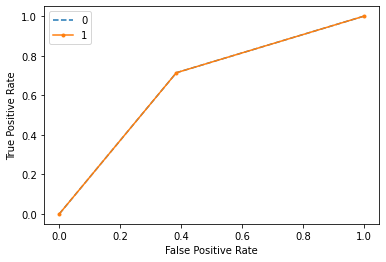

In [65]:
# calculate roc curves
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='0')
plt.plot(lr_fpr, lr_tpr, marker='.', label='1')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.588 auc=0.657


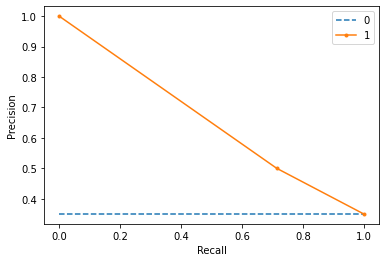

In [68]:
# calculate precision and recall for each threshold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
# calculate scores
lr_f1, lr_auc = f1_score(y_test,y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='0')
plt.plot(lr_recall, lr_precision, marker='.', label='1')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# Navie Bayes Algorithm

In [69]:
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(image_dataset.data,image_dataset.target, random_state=1) 
# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

GaussianNB()

In [71]:
train_score=gnb.score(X_train,y_train)
train_score

0.8

In [72]:
test_score=gnb.score(X_test,y_test)
test_score

0.4

In [76]:
# making predictions on the testing set 
y_pred_gnb= gnb.predict(X_test) 
  
y_pred_gnb

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [78]:
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_gnb)*100)

Gaussian Naive Bayes model accuracy(in %): 40.0


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.22      0.29      0.25         7

    accuracy                           0.40        20
   macro avg       0.38      0.37      0.37        20
weighted avg       0.43      0.40      0.41        20



In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score
acc =  accuracy_score(y_test, y_pred_gnb)
cm = confusion_matrix(y_test, y_pred_gnb)
print(acc)
print(cm)

0.4
[[6 7]
 [5 2]]


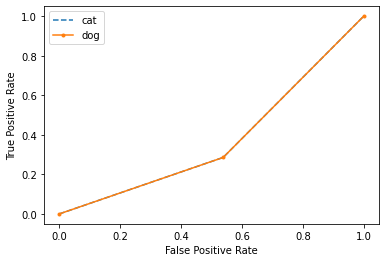

In [82]:
# calculate roc curves
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_pred_gnb)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_gnb)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='cat')
plt.plot(lr_fpr, lr_tpr, marker='.', label='dog')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.250 auc=0.379


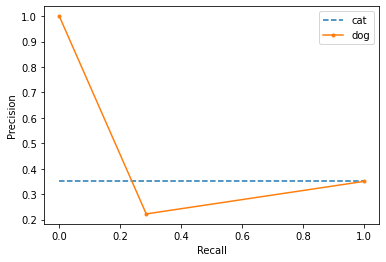

In [83]:
# calculate precision and recall for each threshold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_gnb)
# calculate scores
lr_f1, lr_auc = f1_score(y_test,y_pred_gnb), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='cat')
plt.plot(lr_recall, lr_precision, marker='.', label='dog')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# KNN Algorithm

In [84]:
X_train, X_test, y_train, y_test = train_test_split(image_dataset.data,image_dataset.target,random_state=5)

In [86]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 8)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [87]:
train_score=classifier_knn.score(X_train,y_train)
train_score

0.6666666666666666

In [88]:
test_score=classifier_knn.score(X_test,y_test)
test_score

0.6

In [89]:
y_pred_knn = classifier.predict(X_test)
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
acc =  accuracy_score(y_test, y_pred_knn)
cm = confusion_matrix(y_test, y_pred_knn)
print(acc)
print(cm)

0.6
[[12  2]
 [ 6  0]]


In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75        14
           1       0.00      0.00      0.00         6

    accuracy                           0.60        20
   macro avg       0.33      0.43      0.38        20
weighted avg       0.47      0.60      0.53        20



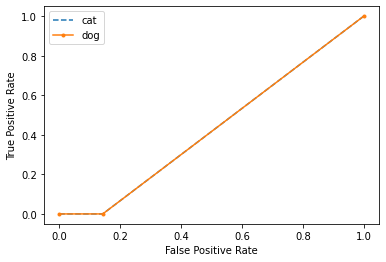

In [92]:
# calculate roc curves
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_pred_knn)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_knn)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='cat')
plt.plot(lr_fpr, lr_tpr, marker='.', label='dog')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.000 auc=0.150


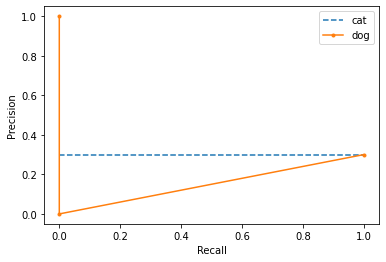

In [93]:
# calculate precision and recall for each threshold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_knn)
# calculate scores
lr_f1, lr_auc = f1_score(y_test,y_pred_knn), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='cat')
plt.plot(lr_recall, lr_precision, marker='.', label='dog')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()